In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [105]:
data = pd.read_csv('heart.csv')

In [106]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [107]:
data_dup = data.duplicated().any()

In [108]:
data_dup

True

In [109]:
data = data.drop_duplicates()

In [110]:
data_dup = data.duplicated().any()

In [111]:
data_dup

False

In [112]:
cate_val = []
cont_val = []
for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [113]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [114]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [115]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [116]:
data['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [117]:
data.describe

<bound method NDFrame.describe of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     52    1   0       125   212    0        1      168      0      1.0   
1     53    1   0       140   203    1        0      155      1      3.1   
2     70    1   0       145   174    0        1      125      1      2.6   
3     61    1   0       148   203    0        1      161      0      0.0   
4     62    0   0       138   294    1        1      106      0      1.9   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
723   68    0   2       120   211    0        0      115      0      1.5   
733   44    0   2       108   141    0        1      175      0      0.6   
739   52    1   0       128   255    0        1      161      1      0.0   
843   59    1   3       160   273    0        0      125      0      0.0   
878   54    1   0       120   188    0        1      113      0      1.4   

     slope  ca  thal  target  
0        2   2     3  

In [118]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [119]:
pip install pandas-profiling

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Text(0, 0.5, 'Count ')

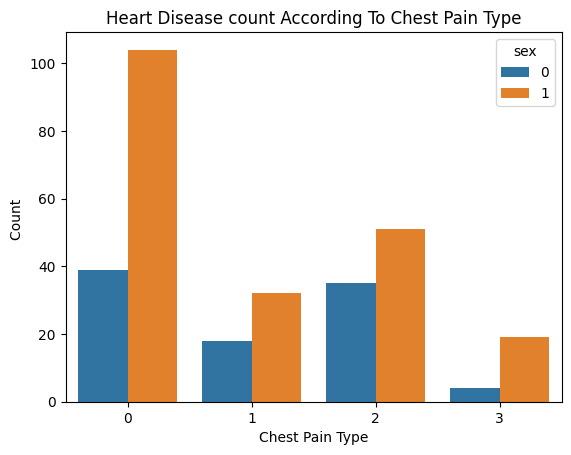

In [120]:
ax = sns.countplot(x="cp",hue="sex", data=data ,palette="tab10")
plt.title('Heart Disease count According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count ')

In [121]:
cate_val.remove('sex')
cate_val.remove('target')
data = pd.get_dummies(data,columns = cate_val,drop_first=True)

Text(0, 0.5, 'trst beats per second ')

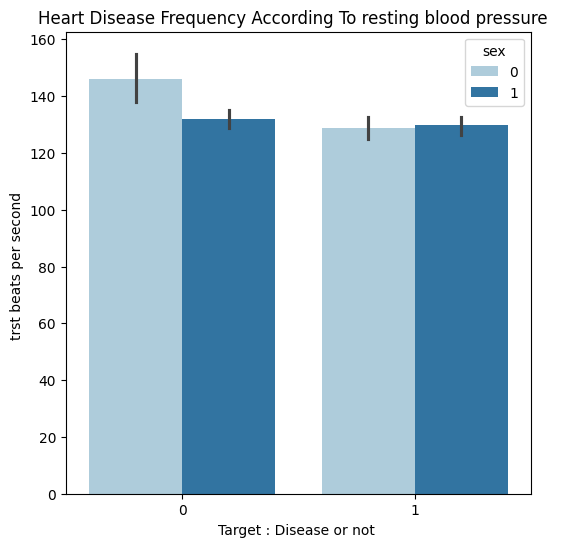

In [122]:
fig_dims = (6,6)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x="target",y="trestbps", hue="sex", data=data)
plt.title('Heart Disease Frequency According To resting blood pressure  ')
plt.xlabel('Target : Disease or not ')
plt.ylabel('trst beats per second ')

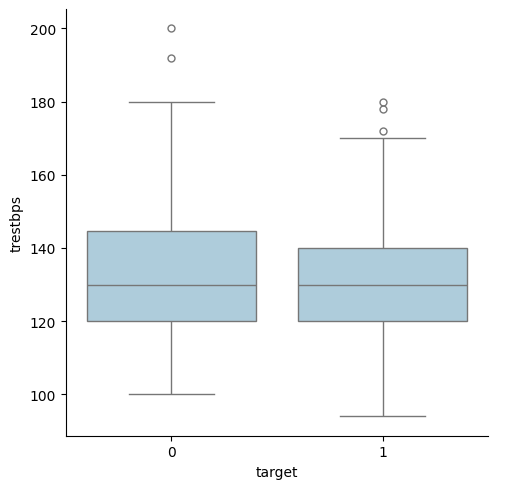

In [123]:
sns.catplot(x="target", y="trestbps", data=data, kind="box")

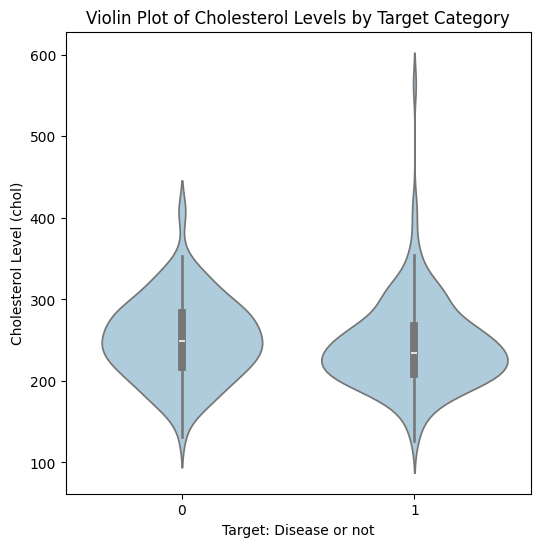

In [124]:
fig_dims = (6, 6)
fig, ax = plt.subplots(figsize=fig_dims)


sns.violinplot(x=data['target'], y=data['chol'], ax=ax)

plt.title('Violin Plot of Cholesterol Levels by Target Category')
plt.xlabel('Target: Disease or not')
plt.ylabel('Cholesterol Level (chol)')

plt.show()

<Axes: xlabel='target', ylabel='thalach'>

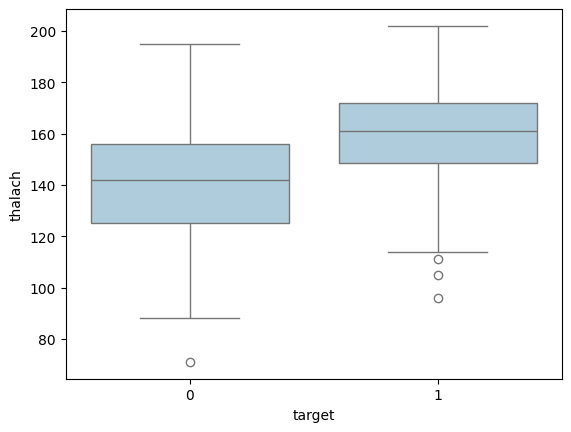

In [125]:
sns.boxplot(y=data['thalach'], x=data['target'])

In [126]:
import plotly.express as px

In [127]:
fig = px.scatter(data, x="thalach", y="age", color="target")
fig.add_shape(
        # Line Vertical
        dict(
            type="line",
            x0=140,
            y0=0,
            x1=140,
            y1=80,
            line=dict(
                color="RoyalBlue",
                width=3
            )
))
fig.add_shape(
        # Line Vertical
        dict(
            type="line",
            x0=190,
            y0=0,
            x1=190,
            y1=80,
            line=dict(
                color="RoyalBlue",
                width=3
            )
))

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'thalach=%{x}<br>age=%{y}<br>target=%{marker.color}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([168, 155, 125, ..., 161, 125, 113], dtype=int64),
              'xaxis': 'x',
              'y': array([52, 53, 70, ..., 52, 59, 54], dtype=int64),
              'yaxis': 'y'}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'target'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'shapes': [{'line': {'color': 'RoyalBlue', 'width': 3},
                           'type': 'line',
                           'x0': 140,
                           'x1': 140,
                           'y0': 0,
                           'y1': 80},
                          {'line': {'color': 'RoyalBlue', 'width': 3},
                           'type': 'line',
                           'x0': 190,
                           'x1': 190,
                           'y0': 0,
                           'y1': 80}],
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'thalach'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'age'}}}
})

In [128]:
sns.set_palette("Paired")

<Axes: xlabel='target', ylabel='oldpeak'>

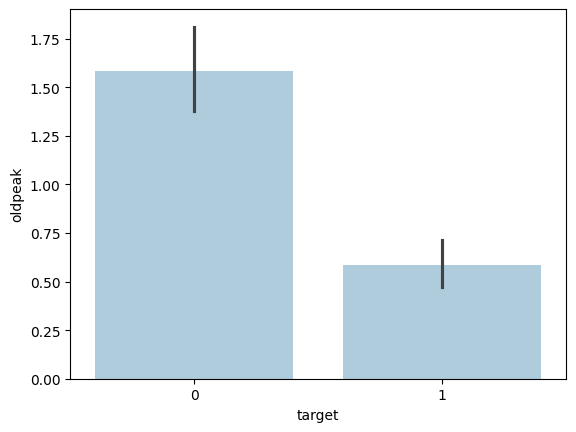

In [129]:
sns.barplot(x=data["target"], y=data["oldpeak"])

In [130]:
from sklearn.preprocessing import StandardScaler

In [131]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [132]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [133]:
X = data.drop('target',axis=1)

In [134]:
y = data['target']

In [135]:
from sklearn.model_selection import train_test_split

In [136]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=42)

In [137]:
y_test

245    1
349    0
135    0
389    1
66     1
      ..
402    1
123    1
739    0
274    1
256    1
Name: target, Length: 61, dtype: int64

In [138]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [139]:
from sklearn.linear_model import LogisticRegression
X=data.drop('target',axis=1)
y=data['target']

In [140]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [141]:
y_pred1 = log.predict(X_test)

In [142]:
from sklearn.metrics import accuracy_score

In [143]:
accuracy_score(y_test,y_pred1)

0.7868852459016393

[[24  8]
 [ 5 24]]


<Axes: >

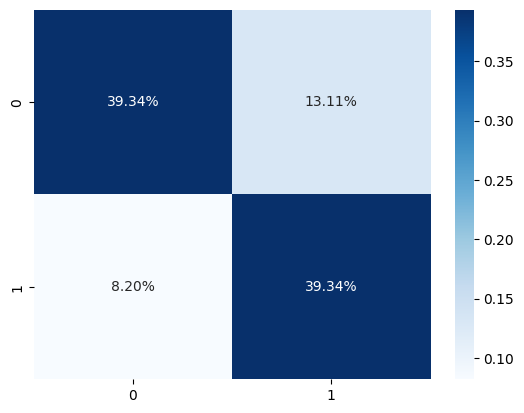

In [144]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred1)
print(cf_matrix)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [145]:
precisions={}
recalls={}
f1_scores={}
#recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred1)
print('Recall: %.3f' % recall)
# precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred1)
print('Precision: %.3f' % precision)
# fi score
f1 = 2*((precision*recall)/(precision+recall))
f1_scores['Logistic Reg'] = f1
print(f1)

Recall: 0.828
Precision: 0.750
0.7868852459016394


In [146]:
from sklearn import svm

In [147]:
svm = svm.SVC()

In [148]:
svm.fit(X_train,y_train)

SVC()

In [149]:
y_pred2 = svm.predict(X_test)

In [150]:
accuracy_score(y_test,y_pred2)

0.8032786885245902

[[24  8]
 [ 4 25]]


<Axes: >

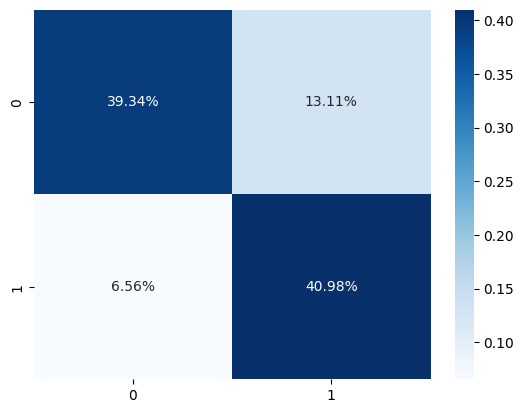

In [151]:
cf_matrix = confusion_matrix(y_test, y_pred2)
print(cf_matrix)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [152]:
#recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred2)
print('Recall: %.3f' % recall)
# precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred2)
print('Precision: %.3f' % precision)
# fi score
f1 = 2*((precision*recall)/(precision+recall))
f1_scores['SVM'] = f1
print(f1)

Recall: 0.862
Precision: 0.758
0.8064516129032258


In [153]:
from sklearn.neighbors import KNeighborsClassifier

In [154]:
knn = KNeighborsClassifier()

In [155]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [156]:
y_pred3=knn.predict(X_test)

In [157]:
accuracy_score(y_test,y_pred3)

0.7377049180327869

In [158]:
score = []

for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))

In [159]:
score

[0.7213114754098361,
 0.8032786885245902,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.8032786885245902,
 0.7868852459016393,
 0.8032786885245902,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869]

In [160]:
import matplotlib.pyplot as plt

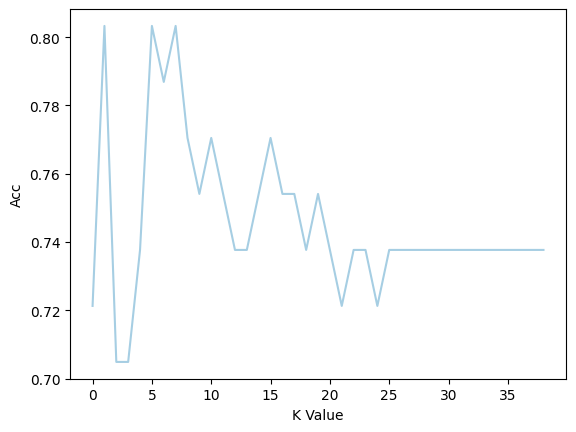

In [161]:
plt.plot(score)
plt.xlabel("K Value")
plt.ylabel("Acc")
plt.show()

In [162]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.8032786885245902

[[20 12]
 [ 4 25]]


<Axes: >

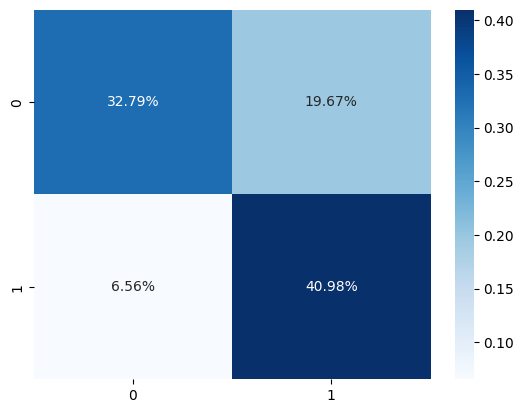

In [163]:
cf_matrix = confusion_matrix(y_test, y_pred3)
print(cf_matrix)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [164]:
#recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred3)
print('Recall: %.3f' % recall)
# precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred3)
print('Precision: %.3f' % precision)
# fi score
f1 = 2*((precision*recall)/(precision+recall))
f1_scores['KNN'] = f1
print(f1)

Recall: 0.862
Precision: 0.676
0.7575757575757576


In [165]:
data = pd.read_csv('heart.csv')

In [166]:
data = data.drop_duplicates()

In [167]:
X = data.drop('target',axis=1)
y=data['target']

In [168]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,
                                                random_state=42)

In [169]:
from sklearn.tree import DecisionTreeClassifier

In [170]:
dt = DecisionTreeClassifier()

In [171]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [172]:
y_pred4= dt.predict(X_test)

In [173]:
accuracy_score(y_test,y_pred4)

0.7213114754098361

[[25  7]
 [10 19]]


<Axes: >

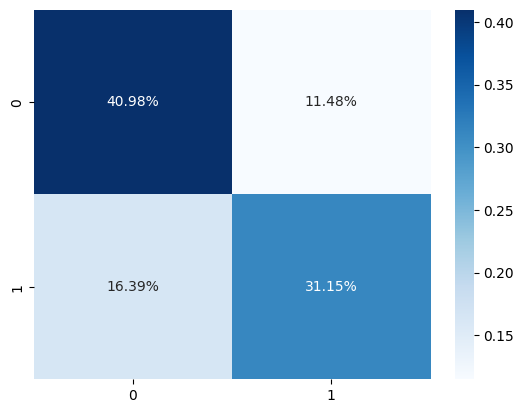

In [174]:
cf_matrix = confusion_matrix(y_test, y_pred4)
print(cf_matrix)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [175]:
#recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred4)
print('Recall: %.3f' % recall)
# precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred4)
print('Precision: %.3f' % precision)
# fi score
f1 = 2*((precision*recall)/(precision+recall))
f1_scores['Decision Tree'] = f1
print(f1)

Recall: 0.655
Precision: 0.731
0.6909090909090909


In [176]:
from sklearn.ensemble import RandomForestClassifier

In [177]:
rf = RandomForestClassifier()

In [178]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [179]:
y_pred5= rf.predict(X_test)

In [180]:
accuracy_score(y_test,y_pred5)

0.8524590163934426

[[26  6]
 [ 3 26]]


<Axes: >

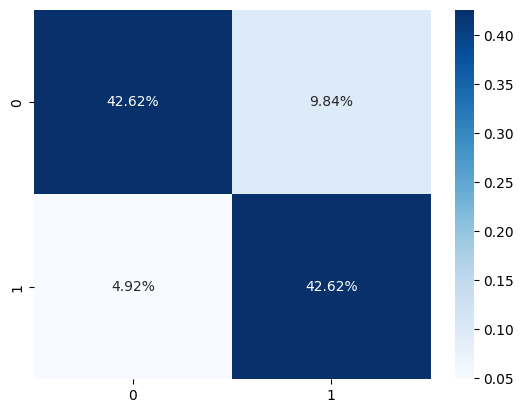

In [181]:
cf_matrix = confusion_matrix(y_test, y_pred5)
print(cf_matrix)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [182]:
#recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred5)
print('Recall: %.3f' % recall)
# precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred5)
print('Precision: %.3f' % precision)
# fi score
f1 = 2*((precision*recall)/(precision+recall))
f1_scores['Random forest'] = f1
print(f1)

Recall: 0.897
Precision: 0.812
0.8524590163934426


In [183]:
from sklearn.naive_bayes import GaussianNB

In [184]:
nb=GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [185]:
y_pred6 = nb.predict(X_test)

In [186]:
accuracy_score(y_test,y_pred6)

0.8524590163934426

In [187]:
final_data = pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','NB'],
                          'ACC':[accuracy_score(y_test,y_pred1)*100,
                                accuracy_score(y_test,y_pred2)*100,
                                accuracy_score(y_test,y_pred3)*100,
                                accuracy_score(y_test,y_pred4)*100,
                                accuracy_score(y_test,y_pred5)*100,
                                accuracy_score(y_test,y_pred6)*100]})

In [188]:
final_data

,Models,ACC
0,LR,78.688525
1,SVM,80.327869
2,KNN,73.770492
3,DT,72.131148
4,RF,85.245902
5,NB,85.245902


In [189]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='ACC'>

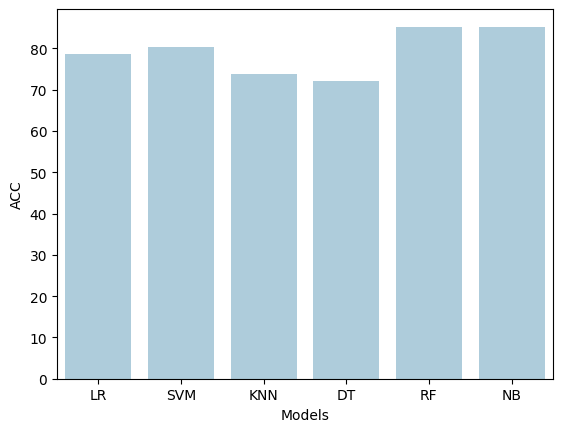

In [190]:
sns.barplot(x=final_data['Models'],y=final_data['ACC'])

In [191]:
X=data.drop('target',axis=1)
y=data['target']

In [192]:
from sklearn.ensemble import RandomForestClassifier

In [193]:
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

In [194]:
import pandas as pd

In [195]:
new_data = pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
     'slope':2,
    'ca':2,
    'thal':3,    
},index=[0])

In [196]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [197]:
p = rf.predict(new_data)
if p[0]==0:
    print("No Disease")
else:
    print("Disease")

No Disease


In [198]:
import joblib

In [199]:
joblib.dump(rf,'model_joblib_rf_heart')


['model_joblib_rf_heart']

In [200]:
model = joblib.load('model_joblib_rf_heart')

In [201]:
model.predict(new_data)

array([0], dtype=int64)

In [202]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0
878,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [203]:
joblib.dump(dt,'model_joblib_decision_tree_heart')

['model_joblib_decision_tree_heart']

In [204]:
joblib.dump(knn,'model_joblib_knn_heart')

['model_joblib_knn_heart']

In [205]:
joblib.dump(log,'model_joblib_logistic_heart')

['model_joblib_logistic_heart']

In [206]:
joblib.dump(nb,'model_joblib_NB_heart')

['model_joblib_NB_heart']